単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

# 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．


In [1]:
from gensim.models import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format('../input/GoogleNews-vectors-negative300.bin', binary=True)

In [12]:
print(word_vectors["United_States"])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982


# 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．



In [14]:
print("cossim:", word_vectors.similarity("United_States", "U.S."))

0.73107743


# 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．



In [17]:
result = word_vectors.similar_by_word("United_States", topn=10)
for similar_key, similarity in result:
    print(f"{similar_key}: {similarity:.4f}")

Unites_States: 0.7877
Untied_States: 0.7541
United_Sates: 0.7401
U.S.: 0.7311
theUnited_States: 0.6404
America: 0.6178
UnitedStates: 0.6167
Europe: 0.6133
countries: 0.6045
Canada: 0.6019


# 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．



In [18]:
vector = word_vectors["Spain"] - word_vectors["Madrid"] + word_vectors["Athens"]
result = word_vectors.similar_by_vector(vector, topn=10)
for similar_key, similarity in result:
    print(f"{similar_key}: {similarity:.4f}")

Athens: 0.7528
Greece: 0.6685
Aristeidis_Grigoriadis: 0.5496
Ioannis_Drymonakos: 0.5361
Greeks: 0.5352
Ioannis_Christou: 0.5330
Hrysopiyi_Devetzi: 0.5088
Iraklion: 0.5059
Greek: 0.5041
Athens_Greece: 0.5034


# 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．



In [21]:
with open("../input/questions-words.txt", mode="r") as f_read:
    with open("../output/questions-words-evaluation.txt", mode="w") as f_write:
        for line in f_read:
            if line.startswith(":"):
                f_write.write(line)
                continue
            a, b, c, ans = line.rstrip().split()
            key, similarity = word_vectors.most_similar(positive=[b, c], negative=[a], topn=1)[0]
            output = f"{a} {b} {c} {ans} {key} {similarity}\n"
            f_write.write(output)


# 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．



In [3]:
with open("../output/questions-words-evaluation.txt", mode="r") as f:
    sem_sum = 0
    sem_cor = 0
    syn_sum = 0
    syn_cor = 0
    is_semantic = True
    for line in f:
        line = line.rstrip().split()
        if line[0] == ":":
            if "gram" in line[1]:
                is_semantic = False
            else:
                is_semantic = True
        else:
            if is_semantic:
                sem_sum += 1
                if line[3] == line[4]:
                    sem_cor += 1
            else:
                syn_sum += 1
                if line[3] == line[4]:
                    syn_cor += 1
    print(f"accuracy for semantic analogy:\t{sem_cor / sem_sum:.4f}")
    print(f"accuracy for syntactic analogy:\t{syn_cor / syn_sum:.4f}")


accuracy for semantic analogy:	0.7309
accuracy for syntactic analogy:	0.7400


# 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．



In [12]:
import pandas as pd

df = pd.read_csv("../input/wordsim353/combined.csv")
df["Cossim"] = [word_vectors.similarity(a, b) for a, b in zip(df["Word 1"], df["Word 2"])]
df.rank(numeric_only=True).corr()

,Human (mean),Cossim
Human (mean),1.000000,0.700017
Cossim,0.700017,1.000000


# 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．



In [29]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from operator import itemgetter

df_countries = pd.read_table(
    "../input/countries.tsv", 
    header=None, 
    names=["Country", "Population", "Land Area", "Density"], 
    index_col=0
)
countries = [country for country in df_countries["Country"] if country in word_vectors]
vectors = [word_vectors[country] for country in countries]

n = 5
kmeans = KMeans(n_clusters=n, random_state=0)
kmeans.fit(vectors)

for i in range(n):
    cluster = np.where(kmeans.labels_ == i)[0]
    cluster = itemgetter(*cluster)(countries)
    print(f"cluster: {i}")
    print(", ".join(cluster) + "\n")

cluster: 0
Afghanistan, Australia, Bahrain, Bangladesh, Bhutan, Brunei, Cambodia, China, Egypt, India, Indonesia, Iran, Iraq, Israel, Japan, Jordan, Kuwait, Kyrgyzstan, Laos, Lebanon, Malaysia, Maldives, Mongolia, Nepal, Oman, Pakistan, Philippines, Qatar, Singapore, Syria, Tajikistan, Thailand, Turkmenistan, Uzbekistan, Vietnam

cluster: 1
Albania, Andorra, Armenia, Austria, Azerbaijan, Belarus, Belgium, Bulgaria, Canada, Croatia, Cyprus, Denmark, Estonia, Finland, France, Georgia, Germany, Greece, Hungary, Iceland, Ireland, Italy, Kazakhstan, Latvia, Liechtenstein, Lithuania, Luxembourg, Malta, Moldova, Monaco, Montenegro, Netherlands, Norway, Poland, Portugal, Romania, Russia, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Turkey, Ukraine

cluster: 2
Algeria, Angola, Benin, Botswana, Burundi, Cameroon, Chad, Comoros, Djibouti, Eritrea, Ethiopia, Gabon, Gambia, Ghana, Guinea, Kenya, Lesotho, Liberia, Libya, Madagascar, Malawi, Mali, Mauritania, Mauritius, Morocco, Mozambique

# 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．



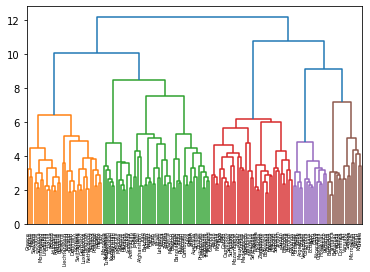

<Figure size 1080x360 with 0 Axes>

In [33]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(vectors, method="ward")
dendrogram(Z, labels=countries)
plt.show()

# 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．


In [34]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
vectors_embedded = tsne.fit_transform(vectors)

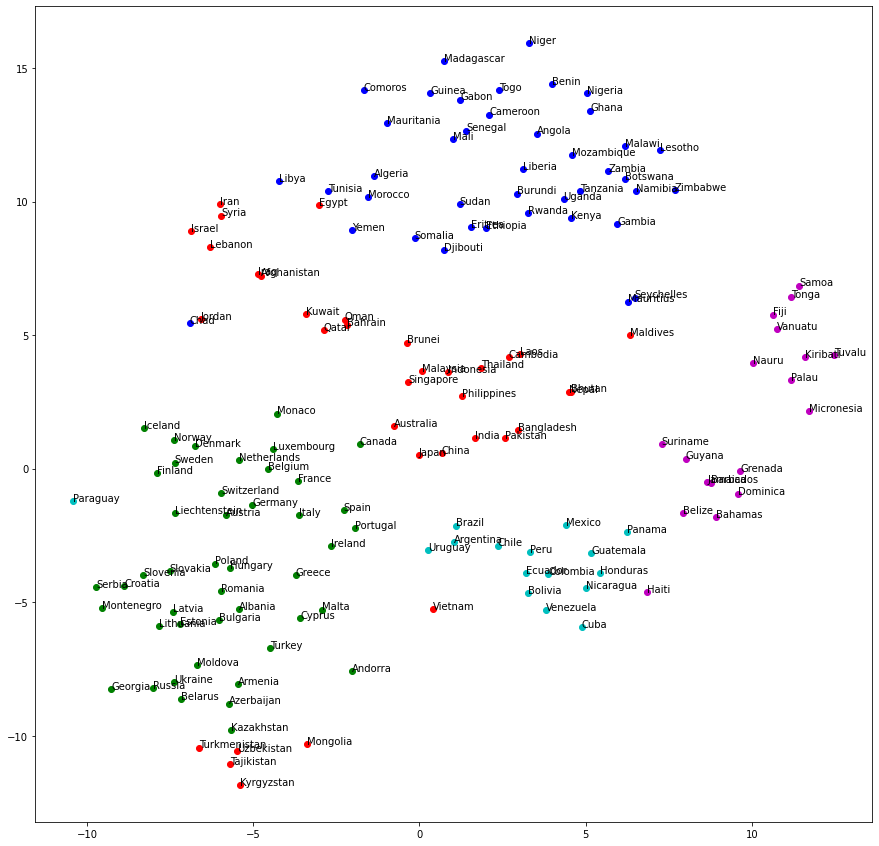

In [48]:
plt.figure(figsize=(15, 15))
colors =  ["r", "g", "b", "c", "m"]
for i in range(n):
    cluster = np.where(kmeans.labels_ == i)[0]
    for idx in cluster:
        plt.scatter(vectors_embedded[idx][0], vectors_embedded[idx][1], color=colors[i])
for (x, y), name in zip(vectors_embedded, countries):
    plt.annotate(name, (x, y))
plt.show()